In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
from tqdm import tqdm




In [31]:
DATASET_DIR = '/content/drive/My Drive/Catsanddogs/'
TEST_DATASET = os.path.join(DATASET_DIR, 'test_set')
TRAIN_DATASET = os.path.join(DATASET_DIR, 'training_set')
VALIDATION_DATASET = os.path.join(DATASET_DIR, 'val_set')

In [32]:
CATEGORIES = []
for c in os.listdir(TRAIN_DATASET):
  CATEGORIES.append(c)
print(CATEGORIES)

['cats', 'dogs']


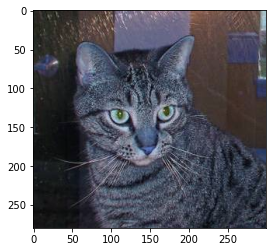

In [4]:
img_arr = cv2.imread('/content/drive/My Drive/Catsanddogs/training_set/cats/cat.1.jpg')
plt.imshow(img_arr)

In [33]:
IMG_SIZE = 100
train_data = []
for c in CATEGORIES:
    path= os.path.join(TRAIN_DATASET,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path, img))
        img_resized = cv2.resize(img_arr,(IMG_SIZE, IMG_SIZE))
        train_data.append([img_resized, class_num])
        
print(len(train_data))

100%|██████████| 3605/3605 [00:23<00:00, 154.41it/s]

7205


In [34]:
X_train = []
Y_train = []

for img, label in train_data:
    X_train.append(img)
    Y_train.append(label)

X_train = np.array(X_train).astype('float32').reshape(-1, 100,100,3)
Y_train = np.array(Y_train)



In [35]:
print(f"Shape of x_train: {X_train.shape}")

Shape of x_train: (7205, 100, 100, 3)


In [36]:
mean_rgb = np.mean(X_train, axis=(0,1,2))
print(mean_rgb)

[59.610928 59.610928 59.610928]


In [37]:
X_train_norm = np.empty_like(X_train)


In [38]:
for i in range(len(X_train)):
    for c in range(3):
        if(c==1):
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[0]
        elif(c==2):
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[1]
        else:
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[2]

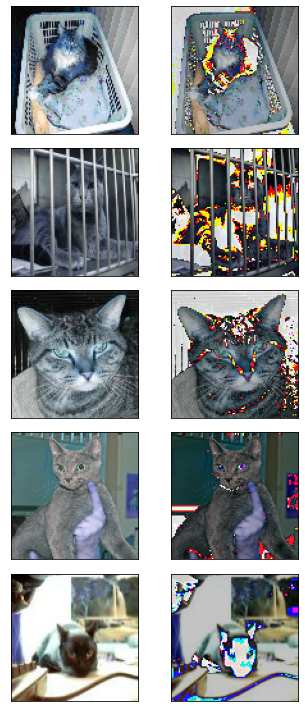

In [39]:
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

In [40]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=X_train_norm.shape[1:]),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    layers.Flatten(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),

    layers.Dense(10),
    layers.Activation('softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 100, 100, 64)      1792      
_________________________________________________________________
activation_26 (Activation)   (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 100, 100, 64)      36928     
_________________________________________________________________
activation_27 (Activation)   (None, 100, 100, 64)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
activation_28 (Activation)   (None, 50, 50, 128)      

In [41]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [46]:
h = model.fit(x=X_train_norm, y=Y_train, 
              epochs=3, 
              validation_split=0.2,
             # batch_size=5,
              #callbacks=[cb]
             )

Epoch 1/3
 63/181 [=========>....................] - ETA: 18:55 - loss: 0.6376 - accuracy: 0.6592

KeyboardInterrupt: ignored

## **Since i used colab i Couldnt train or plot because it was taking way too long**

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--', label='train accuracy')
plt.plot(h.history['val_accuracy'], '--', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--', label='train loss')
plt.plot(h.history['val_loss'], '--', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()